In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('clean_measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_dif,fuel_used,trip_cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.450000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.882000
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.078000
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.880425
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.456875
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.112960
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.301524
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.143040
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.331792


In [3]:
# Calculate and display the correlation matrix for numerical variables

numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()
corr_matrix

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,temp_dif,fuel_used,trip_cost
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,-0.080869,0.992101,0.990205
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.310991,-0.052188,-0.051854
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007281,0.551847,0.544753
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.226734,0.062373,0.061650
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.990354,0.037877,0.040978
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.130734,-0.018700,-0.016873
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.188979,0.009125,0.012290
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.326104,0.064247,0.066169
temp_dif,-0.080869,0.310991,-0.007281,-0.226734,-0.990354,-0.130734,0.188979,-0.326104,1.000000,-0.030272,-0.033616
fuel_used,0.992101,-0.052188,0.551847,0.062373,0.037877,-0.018700,0.009125,0.064247,-0.030272,1.000000,0.999016


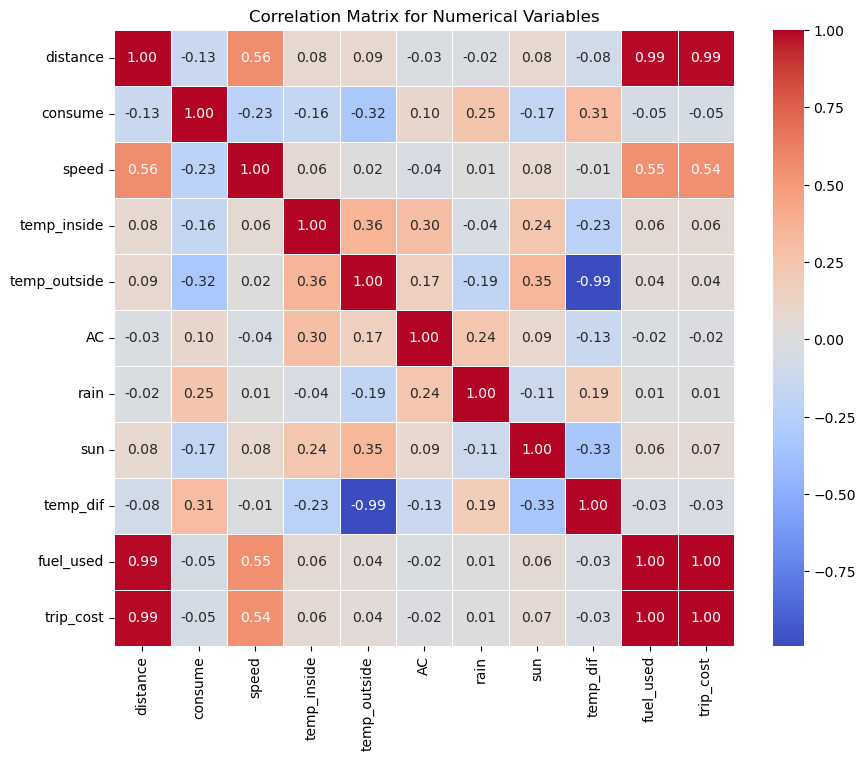

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [5]:
X = data[['distance','speed','temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']]
y = data[['consume']]

In [6]:
X

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,26,21.5,12,E10,0,0,0
1,12.0,30,21.5,13,E10,0,0,0
2,11.2,38,21.5,15,E10,0,0,0
3,12.9,36,21.5,14,E10,0,0,0
4,18.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,SP98,0,0,0
384,16.1,38,25.0,31,SP98,1,0,0
385,16.0,45,25.0,19,SP98,0,0,0
386,15.4,42,25.0,31,SP98,1,0,0


In [7]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [8]:
numerical_columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [9]:
categorical_columns

Index(['gas_type'], dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_numeric = X_train[numerical_columns]
X_train_categorical = X_train[categorical_columns]
X_test_numeric = X_test[numerical_columns]
X_test_categorical = X_test[categorical_columns]

In [11]:
scaler = MinMaxScaler()

X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.transform(X_test_numeric)
X_train_scaled = pd.concat([pd.DataFrame(X_train_numeric_scaled, columns=numerical_columns), X_train_categorical], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_numeric_scaled, columns=numerical_columns), X_test_categorical], axis=1)

In [12]:
# One-hot encode the 'gas_type' column for both training and testing sets
X_train_encoded = pd.get_dummies(X_train_categorical, columns=['gas_type'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_categorical, columns=['gas_type'], drop_first=True)

# Convert boolean values to integers (1 or 0)
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

# Concatenate the encoded columns with the rest of the DataFrames
X_train = pd.concat([X_train.drop('gas_type', axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop('gas_type', axis=1), X_test_encoded], axis=1)



In [13]:
X_test

,distance,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_SP98
271,4.2,32,22.000000,18,0,0,0,0
46,14.2,32,21.500000,7,0,0,0,1
167,12.3,40,21.500000,6,0,0,0,0
42,11.7,37,21.500000,6,0,0,0,0
349,18.3,46,22.000000,16,0,0,0,1
...,...,...,...,...,...,...,...,...
3,12.9,36,21.500000,14,0,0,0,0
18,25.9,39,21.500000,8,0,0,0,0
93,12.4,43,21.929521,10,0,0,0,1
108,11.8,36,21.000000,4,0,0,0,1


#### Linear regression Model:

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.821635986081003
R-squared: 0.09442245281893824


#### Decision Tree Regressor

In [15]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.967980769230769
R-squared: -0.06687348846477792


#### KNeighbors

In [16]:
k_neighbors = 5  
knn_model = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3389384615384615
R-squared: 0.626434253312923


#### Conclusion: 
In this analysis, the k-Neighbors Regressor outperformed other regression models based on metrics such as Mean Squared Error and R-squared. However, it's crucial to consider the specific characteristics of the data and task, and further experimentation with alternative models could provide additional insights.